In [1]:
import warnings

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

In [2]:
movie_data = pd.read_csv('../b. Datasets/Movie Database.csv')

In [3]:
movie_data.shape

(10000, 3)

In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   overview  9971 non-null   object
 1   title     10000 non-null  object
 2   genres_   10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [5]:
display(movie_data.head(2))
display(movie_data.tail(2))

,overview,title,genres_
0,"Led by Woody, Andy's toys live happily in his ...",Toy Story,"['Animation', 'Comedy', 'Family']"
1,When siblings Judy and Peter discover an encha...,Jumanji,"['Adventure', 'Fantasy', 'Family']"


,overview,title,genres_
9998,"During a dark time in the Heian period, when e...",Onmyoji: The Yin Yang Master,"['Drama', 'Fantasy', 'Horror']"
9999,Three gangsters vie for control of the streets...,State Property 2,"['Action', 'Adventure', 'Crime', 'Drama']"


In [6]:
movie_data.isna().sum()

overview    29
title        0
genres_      0
dtype: int64

In [7]:
movie_data.dropna(inplace=True)
movie_data.reset_index(inplace=True, drop='index')

In [8]:
movie_data.shape

(9971, 3)

In [9]:
movie_data['Description'] = movie_data['overview'] + ' ' + re.sub("'|\[|,|\]", "", movie_data.iloc[0]['genres_'])

In [10]:
display(movie_data.head(2))
display(movie_data.tail(2))

,overview,title,genres_,Description
0,"Led by Woody, Andy's toys live happily in his ...",Toy Story,"['Animation', 'Comedy', 'Family']","Led by Woody, Andy's toys live happily in his ..."
1,When siblings Judy and Peter discover an encha...,Jumanji,"['Adventure', 'Fantasy', 'Family']",When siblings Judy and Peter discover an encha...


,overview,title,genres_,Description
9969,"During a dark time in the Heian period, when e...",Onmyoji: The Yin Yang Master,"['Drama', 'Fantasy', 'Horror']","During a dark time in the Heian period, when e..."
9970,Three gangsters vie for control of the streets...,State Property 2,"['Action', 'Adventure', 'Crime', 'Drama']",Three gangsters vie for control of the streets...


In [11]:
text = " ".join(movie_data['overview'])

In [12]:
wordcloud = WordCloud(
                        width=800,
                        height=400,
                        random_state=21,
                        background_color="white",
                        colormap="viridis",
                        collocations=False,
                        stopwords=STOPWORDS
                    ).generate(text)

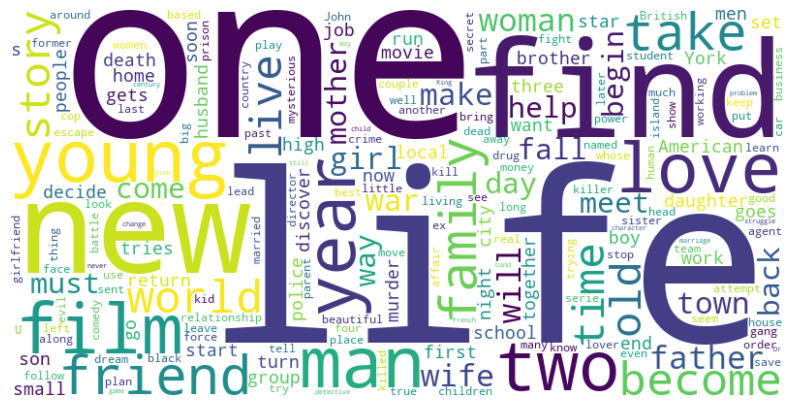

In [13]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
tfidf_vectoriser = TfidfVectorizer(stop_words='english')

In [15]:
vectorised_matrix = tfidf_vectoriser.fit_transform(movie_data['Description'])

In [16]:
cosine_sim = cosine_similarity(vectorised_matrix, vectorised_matrix)

In [17]:
def get_recommendations(title, top_n=10):
    index = movie_data[movie_data['title'] == title].index[0]
    
    similarity_scores = list(enumerate(cosine_sim[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    movie_indices = [i[0] for i in similarity_scores[1 : top_n + 1]]
    recommendations = movie_data[['title', 'genres_', 'overview']].iloc[movie_indices]
    
    scores = [score[1] for score in similarity_scores[1 : top_n + 1]]
    
    return recommendations, scores

In [18]:
recommendation_matrix, similarity_score = get_recommendations('Last Summer')
recommendation_matrix['Similarity Score'] = similarity_score

In [19]:
recommendation_matrix

,title,genres_,overview,Similarity Score
9887,Bilitis,"['Drama', 'Romance']",A coming of age story centering on the exploit...,0.222315
9915,First Desires,"['Drama', 'Romance']",Three teenage girls decide to visit a romantic...,0.157641
9893,Age of Consent,"['Comedy', 'Drama', 'Romance']",An elderly artist thinks he has become too sta...,0.157549
8541,Love with the Proper Stranger,"['Comedy', 'Drama', 'Romance']","When a one-night stand results in pregnancy, a...",0.148062
7345,Wildflowers,['Drama'],A mysterious girl becomes involved with a 17-y...,0.137974
9031,My Father the Hero,"['Comedy', 'Family', 'Romance']",A teenage girl on vacation in the Bahamas with...,0.133586
7078,Win a Date with Tad Hamilton!,"['Comedy', 'Romance']",A small-town girl wins a date with a Hollywood...,0.121150
3163,Hanging Up,"['Comedy', 'Drama']",A trio of sisters bond over their ambivalence ...,0.120225
6471,The Green Ray,"['Drama', 'Romance']",A lonely Parisian woman comes to terms with he...,0.119985
4764,Breathless,"['Drama', 'Crime']",A young car thief kills a policeman and tries ...,0.116663
